# EDA and Processing

# PART I

1 - How to perform a classification task with TensorFlow
2 - How to identify through Early Stopping Callbacks and Dropout Layers

Early Stopping
Automatically stop training based on a loss condition on the validation data passed during the model.fit() call.

Dropout Layers
Dropout can be added to layers to 'turn off' neurons during training to prevent overfitting.

Each Dropout layer will 'drop' a user-defined percentage of neuron units in the previous layer every batch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/Cansu/Documents/_My Python Repository/TensorFlow_FILES/DATA/cancer_classification.csv")

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

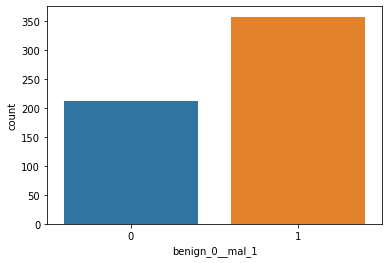

In [6]:
sns.countplot(x = 'benign_0__mal_1', data = df)

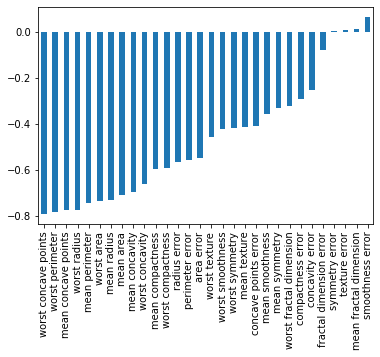

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

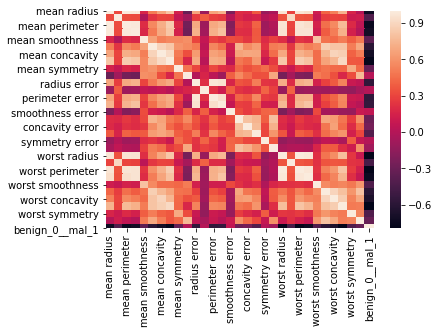

In [8]:
sns.heatmap(df.corr())

In [9]:
X = df.drop('benign_0__mal_1', axis =1).values
y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25, 
                                                    random_state=101)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

# PART II

# Binary Classsification

In [16]:
from tensorflow.keras.models import Sequential

In [17]:
from tensorflow.keras.layers import Dense, Dropout

In [18]:
X_train.shape

(426, 30)

In [19]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid' ))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [22]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6745 - val_loss: 0.6622
Epoch 2/600
426/426 [==============================] - 0s 87us/sample - loss: 0.6465 - val_loss: 0.6347
Epoch 3/600
426/426 [==============================] - 0s 58us/sample - loss: 0.6176 - val_loss: 0.6047
Epoch 4/600
426/426 [==============================] - 0s 59us/sample - loss: 0.5849 - val_loss: 0.5703
Epoch 5/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5483 - val_loss: 0.5311
Epoch 6/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5062 - val_loss: 0.4897
Epoch 7/600
426/426 [==============================] - 0s 59us/sample - loss: 0.4648 - val_loss: 0.4466
Epoch 8/600
426/426 [==============================] - 0s 61us/sample - loss: 0.4236 - val_loss: 0.4049
Epoch 9/600
426/426 [==============================] - 0s 61us/sample - loss: 0.3852 - val_loss: 0.3659
Epoch 10/600
426/42

426/426 [==============================] - 0s 59us/sample - loss: 0.0592 - val_loss: 0.1132
Epoch 79/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0576 - val_loss: 0.1193
Epoch 80/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0569 - val_loss: 0.1145
Epoch 81/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0583 - val_loss: 0.1174
Epoch 82/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0580 - val_loss: 0.1142
Epoch 83/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0602 - val_loss: 0.1162
Epoch 84/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0627 - val_loss: 0.1157
Epoch 85/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0598 - val_loss: 0.1187
Epoch 86/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0609 - val_loss: 0.1138
Epoch 87/600
426/426 [==============================] - 0s 56us/samp

426/426 [==============================] - 0s 68us/sample - loss: 0.0499 - val_loss: 0.1312
Epoch 156/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0457 - val_loss: 0.1253
Epoch 157/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0443 - val_loss: 0.1333
Epoch 158/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0459 - val_loss: 0.1301
Epoch 159/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0442 - val_loss: 0.1274
Epoch 160/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0459 - val_loss: 0.1309
Epoch 161/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0511 - val_loss: 0.1273
Epoch 162/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0448 - val_loss: 0.1368
Epoch 163/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0471 - val_loss: 0.1337
Epoch 164/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 69us/sample - loss: 0.0383 - val_loss: 0.1445
Epoch 233/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0391 - val_loss: 0.1388
Epoch 234/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0403 - val_loss: 0.1325
Epoch 235/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0395 - val_loss: 0.1408
Epoch 236/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0380 - val_loss: 0.1328
Epoch 237/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0395 - val_loss: 0.1361
Epoch 238/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0376 - val_loss: 0.1443
Epoch 239/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0375 - val_loss: 0.1338
Epoch 240/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0410 - val_loss: 0.1314
Epoch 241/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 60us/sample - loss: 0.0334 - val_loss: 0.1440
Epoch 310/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0345 - val_loss: 0.1502
Epoch 311/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0338 - val_loss: 0.1403
Epoch 312/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0344 - val_loss: 0.1441
Epoch 313/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0333 - val_loss: 0.1518
Epoch 314/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0338 - val_loss: 0.1477
Epoch 315/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0326 - val_loss: 0.1406
Epoch 316/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0353 - val_loss: 0.1467
Epoch 317/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0337 - val_loss: 0.1488
Epoch 318/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 63us/sample - loss: 0.0285 - val_loss: 0.1593
Epoch 387/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0285 - val_loss: 0.1659
Epoch 388/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0276 - val_loss: 0.1606
Epoch 389/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0278 - val_loss: 0.1675
Epoch 390/600
426/426 [==============================] - 0s 57us/sample - loss: 0.0299 - val_loss: 0.1574
Epoch 391/600
426/426 [==============================] - 0s 62us/sample - loss: 0.0290 - val_loss: 0.1645
Epoch 392/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0282 - val_loss: 0.1596
Epoch 393/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0341 - val_loss: 0.1632
Epoch 394/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0273 - val_loss: 0.1707
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 61us/sample - loss: 0.0230 - val_loss: 0.1823
Epoch 464/600
426/426 [==============================] - 0s 76us/sample - loss: 0.0232 - val_loss: 0.1804
Epoch 465/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0242 - val_loss: 0.1715
Epoch 466/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0233 - val_loss: 0.1865
Epoch 467/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0232 - val_loss: 0.1939
Epoch 468/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0251 - val_loss: 0.1795
Epoch 469/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0247 - val_loss: 0.1824
Epoch 470/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0228 - val_loss: 0.1765
Epoch 471/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0227 - val_loss: 0.1926
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 62us/sample - loss: 0.0168 - val_loss: 0.2040
Epoch 541/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0236 - val_loss: 0.2525
Epoch 542/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0194 - val_loss: 0.2160
Epoch 543/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0166 - val_loss: 0.2162
Epoch 544/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0173 - val_loss: 0.2105
Epoch 545/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0167 - val_loss: 0.2099
Epoch 546/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0161 - val_loss: 0.2224
Epoch 547/600
426/426 [==============================] - 0s 60us/sample - loss: 0.0166 - val_loss: 0.2189
Epoch 548/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0176 - val_loss: 0.2530
Epoch 549/600
426/426 [==============================] - 0s 

In [23]:
losses = pd.DataFrame(model.history.history)

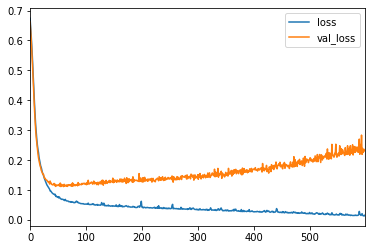

In [24]:
losses.plot()

# Early Stopping

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid' ))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [27]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [29]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', 
                           verbose= 1, patience=25)

In [30]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6930 - val_loss: 0.6719
Epoch 2/600
426/426 [==============================] - 0s 77us/sample - loss: 0.6667 - val_loss: 0.6453
Epoch 3/600
426/426 [==============================] - 0s 77us/sample - loss: 0.6388 - val_loss: 0.6138
Epoch 4/600
426/426 [==============================] - 0s 85us/sample - loss: 0.6036 - val_loss: 0.5692
Epoch 5/600
426/426 [==============================] - 0s 81us/sample - loss: 0.5545 - val_loss: 0.5157
Epoch 6/600
426/426 [==============================] - 0s 80us/sample - loss: 0.5010 - val_loss: 0.4582
Epoch 7/600
426/426 [==============================] - 0s 85us/sample - loss: 0.4436 - val_loss: 0.3992
Epoch 8/600
426/426 [==============================] - 0s 78us/sample - loss: 0.3868 - val_loss: 0.3446
Epoch 9/600
426/426 [==============================] - 0s 72us/sample - loss: 0.3382 - val_loss: 0.3001
Epoch 10/600
426/42

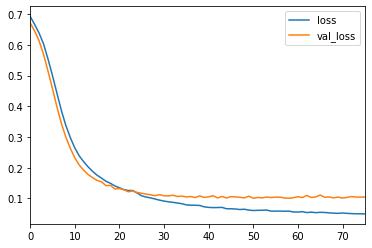

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Drop Out

In [32]:
from tensorflow.keras.layers import Dropout

In [33]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation = 'sigmoid' ))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [34]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6947 - val_loss: 0.6832
Epoch 2/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6770 - val_loss: 0.6750
Epoch 3/600
426/426 [==============================] - 0s 76us/sample - loss: 0.6702 - val_loss: 0.6645
Epoch 4/600
426/426 [==============================] - 0s 67us/sample - loss: 0.6598 - val_loss: 0.6487
Epoch 5/600
426/426 [==============================] - 0s 73us/sample - loss: 0.6408 - val_loss: 0.6304
Epoch 6/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6258 - val_loss: 0.6060
Epoch 7/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5910 - val_loss: 0.5688
Epoch 8/600
426/426 [==============================] - 0s 73us/sample - loss: 0.5838 - val_loss: 0.5385
Epoch 9/600
426/426 [==============================] - 0s 74us/sample - loss: 0.5413 - val_loss: 0.4998
Epoch 10/600
426/42

426/426 [==============================] - 0s 72us/sample - loss: 0.1136 - val_loss: 0.1021
Epoch 79/600
426/426 [==============================] - 0s 70us/sample - loss: 0.1241 - val_loss: 0.1048
Epoch 80/600
426/426 [==============================] - 0s 71us/sample - loss: 0.1280 - val_loss: 0.1095
Epoch 81/600
426/426 [==============================] - 0s 68us/sample - loss: 0.1137 - val_loss: 0.0987
Epoch 82/600
426/426 [==============================] - 0s 77us/sample - loss: 0.1129 - val_loss: 0.1083
Epoch 83/600
426/426 [==============================] - 0s 76us/sample - loss: 0.1135 - val_loss: 0.1139
Epoch 84/600
426/426 [==============================] - 0s 71us/sample - loss: 0.1110 - val_loss: 0.0997
Epoch 85/600
426/426 [==============================] - 0s 69us/sample - loss: 0.1254 - val_loss: 0.1012
Epoch 86/600
426/426 [==============================] - 0s 67us/sample - loss: 0.1200 - val_loss: 0.1101
Epoch 87/600
426/426 [==============================] - 0s 73us/samp

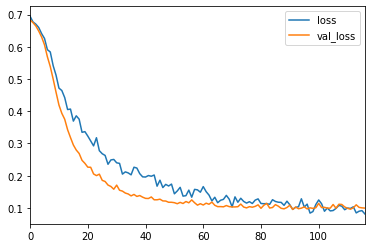

In [35]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [37]:
predictions = model.predict_classes(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [40]:
print(confusion_matrix(y_test, predictions))

[[53  2]
 [ 2 86]]
